#            TRABAJO FINAL - GRUPO 7

# Detección de "fake news" mediante técnicas de Machine Learning 

### Integrantes Grupo:
    Daniela Rodriguez Golpe
    Mercedes Dorado
    Matías Chaves
    Edgar Wendler
    Nashira Calvo

## Introducción

Las noticias falsas (también conocidas como "fake news"), son un tipo de noticia diseñada y emitida con la intención deliberada de engañar, inducir a error, manipular decisiones personales o desprestigiar a una determinada entidad o persona (Alonso Valenzuela, 2020). Se divulgan a través de distintos medios, tales como portales de noticas, prensa escrita, radio, televisión y redes sociales. El principal objetivo de esta clase de noticias es la desinformación.

Los avances de los últimos años en Inteligencia Artificial, particularmente en el procesamiento del lenguaje
natural, han permitido que las máquinas puedan analizar y comprender textos escritos conociendo no sólo las palabras que componen el texto, sino también el contexto en el que aparecen, esto tiene una gran cantidad de aplicaciones, como generación
de textos, traducción automática y clasificación de documentos, entre otras.

A partir de un dataset que contiene una lista de artículos de los cuales algunos son "fake news" nos preguntamos si es posible desarrollar un algoritmo capaz de diferenciar si un artículo se trata de una "fake news" o de una noticia real.
Se cita en el presente link la fuente del dataset original:

https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?datasetId=572515&language=Python


## Objetivo

Desarrollar un sistema de detección de "fake news" aplicando diversos métodos de clasificación y realizando un estudio comparativo entre ellos, que permitirá sopesar las ventajas y desventajas de cada uno a fin de determinar cuál es el más apropiado para resolver el problema.<br>   

## Metodología

El método empleado para alcanzar el objetivo consistió en aplicar las técnicas de Text Mining para descubrir patrones repetitivos, tendencias o reglas que explican el comportamiento del texto contenido en los artículos del dataset. Los datos a utilizar son de tipo texto, de manera que se buscó extraer información sobre el contenido de los textos y representarlo como una matriz de features, a fin de poder aplicar  los algoritmos de machine learning que aprendimos para hacer clasificación durante el curso. Se implementaron un total de 5 modelos y se realizaron comparaciones entre los resultados de accuracy score obtenidos. Para la implementación de estos algoritmos se han utilizado algunas de las librerías más extendidas en el campo del Machine Learning, como scikit-learn, nltk, numpy y pandas, entre otras.

In [1]:
#importamos librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fake_df = pd.read_csv('data/Fake.csv')
real_df = pd.read_csv('data/True.csv')

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Creamos una columna llamada 'target' que es '0' para noticias falsas y '1' para noticias reales. Borramos las columnas innecesarias y juntamos ambas bases de datos en uno.

In [5]:
fake_df['target'] = 0 
real_df['target'] = 1

Verificamos que la columna subject no aporta valor predictivo porque las categorías no coinciden y esto no le permitiría al modelo tener un accuracy perfecto.

In [6]:
fake_df['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [7]:
real_df['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [8]:
fake_df.drop(['date', 'subject'], axis=1, inplace=True)
real_df.drop(['date', 'subject'], axis=1, inplace=True)

In [9]:
df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)
df.head()

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [10]:
df.tail()

,title,text,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,1


In [11]:
# Combinamos el 'title' y''text column'

df['text'] = df['title'] + df['text']
df.drop('title', axis=1, inplace=True)


In [12]:
df

,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,1
44894,LexisNexis withdrew two products from Chinese ...,1
44895,Minsk cultural hub becomes haven from authorit...,1
44896,Vatican upbeat on possibility of Pope Francis ...,1


0    52.298543
1    47.701457
Name: target, dtype: float64


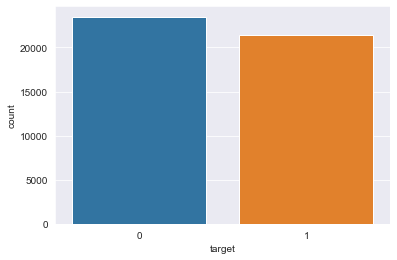

In [13]:
# Corroboramos el balance del dataset
sns.set_style("darkgrid")
sns.countplot(x=df.target);
print(df['target'].value_counts(normalize = True)*100)

In [14]:
#Verificamos si existen valores nulos
df.isna().sum()

text      0
target    0
dtype: int64

In [15]:
# tratamiento de duplicados
print('\nHay duplicados?')
print('Hay ',df.duplicated(['text']).sum(),'registros duplicados')

# eliminamos los registros duplicados
df.drop_duplicates(['text'], inplace = True,keep='last')

print('\nQuedan registros duplicados?', df.duplicated(['text']).any())


Hay duplicados?
Hay  5793 registros duplicados

Quedan registros duplicados? False


1    54.205345
0    45.794655
Name: target, dtype: float64


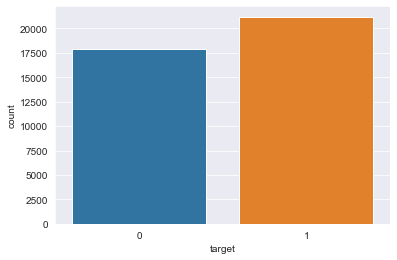

In [16]:
# Corroboramos el balance del dataset luego del drop de duplicados
sns.set_style("darkgrid")
sns.countplot(x=df.target);
print(df['target'].value_counts(normalize = True)*100)

Se observa que el dataset está balanceado.

## Metodología Bag of Words

Para representar las noticias conservaremos únicamente su conjunto de palabras y el número de veces que aparecen en la noticia. 
Este enfoque pierde sentido al descartar la estructura de los textos como párrafos, capítulos, orden en el que aparecen las palabras, etc.
Como beneficio reduce significativamente la dimensionalidad y por ende el costo computacional.
Llamaremos **corpus** al conjunto de noticias de nuestro dataset y **documento** a cada noticia, que es nuestra unidad de dato.

Computar la representación "bag of words" de un corpus de documentos conlleva tres pasos:

1. **Tokenización**: convertir cada documento a una lista de palabras (y signos de puntuación) que lo componen.

2. **Construcción de un vocabulario**: colectar todas las palabras que se registraron en el corpus y ordenarlas (típicamente por orden alfabético).

3. **Encoding**: representar los documentos como vectores en el espacio de las palabras del vocabulario.

1. Tokenización:

 La librería NLTK cuenta con herramientas para hacer ésto, identificando los signos de puntuación: cuándo los mismos separan oraciones y cuándo cumplen otra función, como una abreviatura.
        

In [17]:
import nltk
nltk.download('punkt')    # esta linea hay que ejecutarla sólo una vez
nltk.download('stopwords') # esta linea hay que ejecutarla sólo una vez
nltk.download('wordnet')    # esta linea hay que ejecutarla sólo una vez
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to C:\Users\Mati-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mati-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mati-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Construcción de un vocabulario

Podríamos tokenizar todos los documentos y definir el vocabulario como el set de palabras que aparecieron al menos una vez en todo el corpus.
Esto tiene el problema de que el número de palabras será muy grande y muchas de ellas serán muy poco informativas sobre el contenido del texto, por ejemplo las preposiciones, pronombres, etc. 
A estas palabras se las llama **stopwords** y a menudo se las **excluye del vocabulario**. 

NLTK tiene listas de stopwords en distintos idiomas, nuestro dataset tiene noticias exclusivamente en inglés así que solo utilizaremos esta:

In [18]:
from nltk.corpus import stopwords 

stopwords_en = stopwords.words('english');

print(stopwords_en[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


Tokenizamos utilizando CountVectorizer de scikit-learn

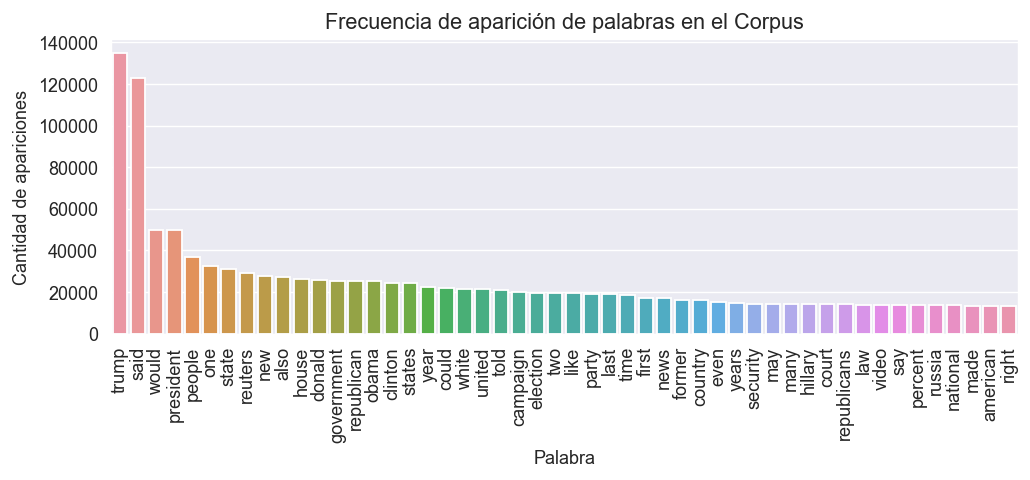

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer(lowercase=True,strip_accents='unicode', stop_words=stopwords_en)

X=vect.fit_transform(df['text'])    
sum_words=X.sum(axis=0)
words_freq = sorted([(word, sum_words[0, idx]) for word, idx in  vect.vocabulary_.items()],reverse=False)
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
wf_df=pd.DataFrame(words_freq,columns=['Palabra','Cantidad de apariciones'])
   
plt.figure(figsize=(9,3),dpi=130)
sns.barplot(data=wf_df.head(50),x='Palabra',y='Cantidad de apariciones')
plt.title("Frecuencia de aparición de palabras en el Corpus")
plt.xticks(rotation=90);


Utilizando CountVectorizer, ya tenemos creada la matriz esparsa que almacena el "Bag of Words".

Se podría crear un DataFrame de pandas con esta matriz para poder visualizar mejor su contenido. El algoritmo necesario para realizarlo sería el siguiente:

X_pd = pd.DataFrame(X.todense(),columns=vect.get_feature_names())

No se ejecuta la línea de código porque para definir X_pd se debería contar con 40.9 GiB de memoria RAM.    

In [20]:
### encontré este trabajo https://www.cienciadedatos.net/documentos/py25-text-mining-python.html que puede ser interesante porque
# utiliza una función de "limpieza"

### Transformación Tf-idf (Term Frequency Inverse Document Frequency)

La representación de los textos generada mediante `CountVectorizer` tiene en cuenta cuántas veces se observó cada término del vocabulario en cada documento. 

**Esto plantea ciertas problemáticas**: 

* En un documento mucho más largo que los otros, el conteo de palabras puede resultar en números mucho mayores que en el resto de los documentos. 

    Para corregir esta anomalía, deberíamos normalizar (dividir) el conteo de cada palabra por el tamaño de cada documento.

* Una palabra que aparece muchas veces en un documento, pero pocas veces en los demás, es una palabra muy distintiva de ese documento y será importante para representarlo. Mientras que palabras que aparecen pocas veces, o que aparecen en muchos documentos serán menos informativas. 
    Para corregir esto, se debería relacionar la frecuencia de aparición de una palabra con su frecuencia en el corpus.

La transformación TF-IDF aborda ambas problemáticas y por eso la usaremos con la matriz esparsa creada con CountVectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

X_Tfidf=TfidfTransformer().fit_transform(X)


### División del dataset en Train y Test

In [22]:
X_ = df['text']
y_ = df['target']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Tfidf, df['target'], random_state=1)
print('Hay', y_train.shape[0], 'datos de entrenamiento y', y_test.shape[0], 'datos de testeo')

Hay 29328 datos de entrenamiento y 9777 datos de testeo


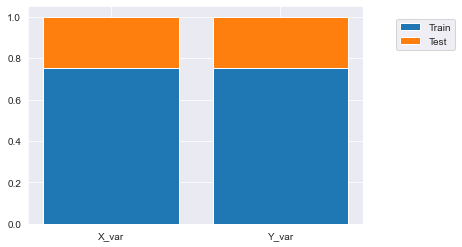

In [24]:
#Suma esta verificación?
xplot = ['X_var','Y_var']
trainplot = [X_train.shape[0]/X_.shape[0],y_train.shape[0]/y_.shape[0]]
testplot = [X_test.shape[0]/X_.shape[0],y_test.shape[0]/y_.shape[0]]
fig, ax = plt.subplots()
ax.bar(xplot,trainplot,label = 'Train')
ax.bar(xplot,testplot,bottom = trainplot,label = 'Test')
ax.legend(loc = (1.1,0.8))

### Creación de modelos de clasificación

### 1- Modelo Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

NBC=MultinomialNB()
NBC.fit(X_train,y_train)

y_pred=NBC.predict(X_test)

print('Training set shape:',X_train.shape)

print('\nTest Accuracy:',accuracy_score(y_test,y_pred))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,y_pred))

Training set shape: (29328, 140379)

Test Accuracy: 0.9380177968702056

Confusion Matrix:
 [[4048  437]
 [ 169 5123]]


Text(0.5, 1.0, 'Confusion Matrix')

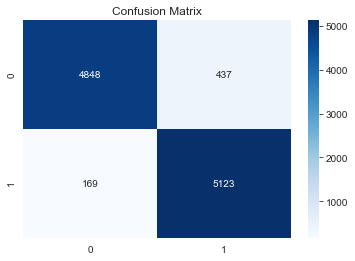

In [26]:
cm_NBC = np.array([[4848,   437],[169,  5123]])
sns.heatmap(cm_NBC, annot=True,fmt="d",cmap='Blues')
plt.title('Confusion Matrix')

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      4485
           1       0.92      0.97      0.94      5292

    accuracy                           0.94      9777
   macro avg       0.94      0.94      0.94      9777
weighted avg       0.94      0.94      0.94      9777



In [28]:
# Construimos una tabla para ir guardando las métricas de los modelos y luego poder compararlas

compare_models = pd.DataFrame(columns = ['model', 'accuracy_score'])
compare_models.loc[0,'model'] = 'NBM'
compare_models.loc[0,'accuracy_score'] = accuracy_score(y_test,y_pred)
compare_models

,model,accuracy_score
0,NBM,0.938018


### 2- Modelo Regresión Logística

In [29]:
from sklearn.linear_model import LogisticRegression

LRM=LogisticRegression(penalty='none', solver='newton-cg')

LRM.fit(X_train, y_train)
y_pred = LRM.predict(X_test)

print('Training set shape:',X_train.shape)

print('\nTest Accuracy:',accuracy_score(y_test,y_pred))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,y_pred))

Training set shape: (29328, 140379)

Test Accuracy: 0.9930449012989669

Confusion Matrix:
 [[4443   42]
 [  26 5266]]


Text(0.5, 1.0, 'Confusion Matrix')

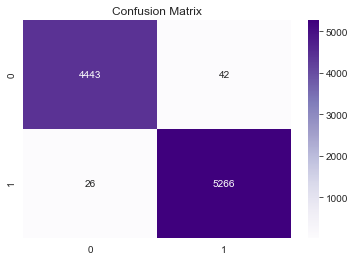

In [30]:
cm_NBC = np.array([[4443,   42],[26,  5266]])
sns.heatmap(cm_NBC, annot=True,fmt="d",cmap='Purples')
plt.title('Confusion Matrix')

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4485
           1       0.99      1.00      0.99      5292

    accuracy                           0.99      9777
   macro avg       0.99      0.99      0.99      9777
weighted avg       0.99      0.99      0.99      9777



In [32]:
compare_models.loc[1,'model'] = 'LRM'
compare_models.loc[1,'accuracy_score'] = accuracy_score(y_test,y_pred)

### 3- Modelo Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

RFM=RandomForestClassifier()

RFM.fit(X_train, y_train)
y_pred = RFM.predict(X_test)

print('Training set shape:',X_train.shape)

print('\nTest Accuracy:',accuracy_score(y_test,y_pred))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,y_pred))

Training set shape: (29328, 140379)

Test Accuracy: 0.9842487470594252

Confusion Matrix:
 [[4373  112]
 [  42 5250]]


In [43]:
import sklearn.metrics as metrics

train_accuracy = []
test_accuracy = []

N_estimadores = [25,50,100,250,500]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)


25
50
100
250
500


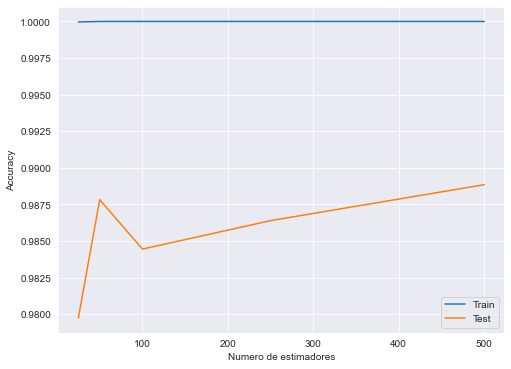

In [45]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()


In [48]:
#intanciamos el modelo, parametros y GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFM=RandomForestClassifier(random_state=101)

param_grid={'n_estimators':[25,50,100,250],
           'max_features':['sqrt','log2','None']}

grid_RFM=GridSearchCV(RFM,param_grid,n_jobs=-1,verbose=1)
grid_RFM.fit(X_train,y_train)
grid_RFM.cv_results_.keys()
display(grid_RFM.best_estimator_,grid_RFM.best_score_,grid_RFM.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  7.6min finished


RandomForestClassifier(max_features='sqrt', n_estimators=250, random_state=101)

0.986668096729197

{'max_features': 'sqrt', 'n_estimators': 250}

Devolución Ionatan
Queda pendiente:
Realizar un pipeline para comparar los modelos, para comparar si ayuda o no los stopwords, integrar PCA o SVD (se podría seleccionar las features en función de un cum_sum y que se explique un 70% por ejemplo), realizar un deploy e integrar con flask para que podamos darle una noticia con un index y que nos prediga si es fake o real. Cero estética


## Referencias

Alonso Valenzuela, J. C. (2020). Detección de Fake News mediante técnicas de Deep Learning. Tesis de grado. Escuela Técnica Superior de Ingeniería Infomática. Universidad de Sevilla. Disponible en línea en: https://idus.us.es/handle/11441/127048